# Long Short Term Memory with Keras​ (LSTM)

<a id="99"></a>
## Implementing Long Short Term Memory with Keras
* [Loading and Visualizing Data](#41)
* [Preprocessing Data](#42)
* [Create LSTM Model](#43)
* [Predictions and Visualising LSTM Model](#44)

<a id="41"></a>
### Loading and Visualizing Data

In [1]:
import numpy
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import math
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

/anaconda3/lib/python3.6/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [3]:
data = pd.read_csv('international-airline-passengers.csv',skipfooter=5)
data

,Month,#Passengers
0,1949-01,112
1,1949-02,118
2,1949-03,132
3,1949-04,129
4,1949-05,121
5,1949-06,135
6,1949-07,148
7,1949-08,148
8,1949-09,136
9,1949-10,119


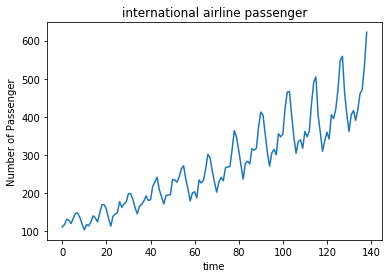

In [179]:
dataset = data.iloc[:,1].values
plt.plot(dataset)
plt.xlabel("time")
plt.ylabel("Number of Passenger")
plt.title("international airline passenger")
plt.show()

<a id="42"></a>
### Preprocessing Data

In [180]:
#reshape
dataset = dataset.reshape(-1,1)
dataset = dataset.astype("float32")
dataset.shape

(139, 1)

In [181]:
# scaling 
scaler = MinMaxScaler(feature_range=(0, 1))
dataset = scaler.fit_transform(dataset)

In [182]:
def create_dataset(dataset, look_back):
    dataX, dataY = [], []
    for i in range(len(dataset)-look_back-1):
        a = dataset[i:(i+look_back), 0]
        dataX.append(a)
        dataY.append(dataset[i + look_back, 0])
    return numpy.array(dataX), numpy.array(dataY)

In [183]:
def split_data(X, y, test_size):
    pos = int(round(len(X) * (1-test_size)))
    X_train, y_train = X[:pos], y[:pos]
    X_test, y_test = X[pos:], y[pos:]
    return X_train, y_train, X_test, y_test

In [184]:
look_back = 1
X, y = create_dataset(dataset, look_back)
print("X:{},y:{}".format(X.shape, y.shape))
X_train, y_train, X_test, y_test = split_data(X, y, 0.33)
print("X_train:{},y_train:{},X_test:{},y_test{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X:(137, 1),y:(137,)
X_train:(92, 1),y_train:(92,),X_test:(45, 1),y_test(45,)


In [185]:
#reshape
y = y.reshape(-1,1)
y_train=y_train.reshape(-1,1)
y_test=y_test.reshape(-1,1)
print("X_train:{},y_train:{},X_test:{},y_test{}".format(X_train.shape, y_train.shape, X_test.shape, y_test.shape))

X_train:(92, 1),y_train:(92, 1),X_test:(45, 1),y_test(45, 1)


In [186]:
# reshape input to be [samples, time steps, features]

X_train = np.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = np.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))


<a id="43"></a>
### Create LSTM Model

In [187]:
# model
model = Sequential()
model.add(LSTM(4, input_shape=(1, look_back)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model.fit(X_train, y_train, epochs=50, batch_size=1)

Epoch 1/50
92/92 [==============================] - 1s 13ms/step - loss: 0.0491
Epoch 2/50
92/92 [==============================] - 0s 3ms/step - loss: 0.0264
Epoch 3/50
92/92 [==============================] - 0s 3ms/step - loss: 0.0189
Epoch 4/50
92/92 [==============================] - 0s 3ms/step - loss: 0.0166
Epoch 5/50
92/92 [==============================] - 0s 3ms/step - loss: 0.0157
Epoch 6/50
92/92 [==============================] - 0s 3ms/step - loss: 0.0149
Epoch 7/50
92/92 [==============================] - 0s 3ms/step - loss: 0.0140
Epoch 8/50
92/92 [==============================] - 0s 3ms/step - loss: 0.0132
Epoch 9/50
92/92 [==============================] - 0s 3ms/step - loss: 0.0123
Epoch 10/50
92/92 [==============================] - 0s 3ms/step - loss: 0.0115
Epoch 11/50
92/92 [==============================] - 0s 3ms/step - loss: 0.0106
Epoch 12/50
92/92 [==============================] - 0s 3ms/step - loss: 0.0097
Epoch 13/50
92/92 [=============================

<a id="44"></a>
### Predictions and Visualising LSTM Model

In [188]:
X_train = numpy.reshape(X_train, (X_train.shape[0], 1, X_train.shape[1]))
X_test = numpy.reshape(X_test, (X_test.shape[0], 1, X_test.shape[1]))
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
trainPredict = model.predict(X_train)
testPredict = model.predict(X_test)


(92, 1, 1)
(92, 1)
(45, 1, 1)
(45, 1)


In [189]:
trainPredict = scaler.inverse_transform(trainPredict)
trainY = scaler.inverse_transform(y_train)
testPredict = scaler.inverse_transform(testPredict)
testY = scaler.inverse_transform(y_test)

In [205]:
trainY=trainY.reshape(1,-1)
testY = testY.reshape(1,-1)
# calculate root mean squared error
trainSctrainScore = math.sqrt(mean_squared_error(trainY[0], trainPredict[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = math.sqrt(mean_squared_error(testY[0], testPredict[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

(1, 92)
(92, 1)
Train Score: 17.90 RMSE
Test Score: 43.60 RMSE


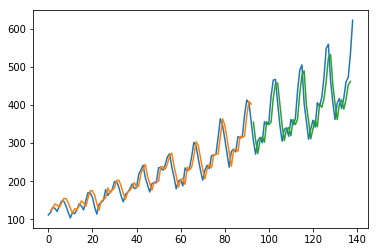

In [209]:
trainPredictPlot = numpy.empty_like(dataset)
trainPredictPlot[:, :] = numpy.nan
trainPredictPlot[look_back:len(trainPredict)+look_back, :] = trainPredict
# shift test predictions for plotting
testPredictPlot = numpy.empty_like(dataset)
testPredictPlot[:, :] = numpy.nan
testPredictPlot[len(trainPredict)+(look_back):len(dataset)-1, :] = testPredict
# plot baseline and predictions
plt.plot(scaler.inverse_transform(dataset))
plt.plot(trainPredictPlot)
plt.plot(testPredictPlot)
plt.show()


In [212]:
test1=numpy.reshape(test1,(len(test1),1,1))
y_pred=model.predict(test1)
y_pred=scaler.fit_transform(y_pred)
test=scaler.fit_transform(test)

In [216]:
test1

array([[[0.24131274]],

       [[0.1911197 ]],

       [[0.24131274]],

       [[0.26640925]],

       [[0.24903473]],

       [[0.31467178]],

       [[0.3185328 ]],

       [[0.32046333]],

       [[0.4073359 ]],

       [[0.5019305 ]],

       [[0.46911195]],

       [[0.40154442]],

       [[0.32818535]],

       [[0.25675675]],

       [[0.3359073 ]],

       [[0.34749034]],

       [[0.33397684]],

       [[0.41119692]],

       [[0.4034749 ]],

       [[0.4131274 ]],

       [[0.52123547]],

       [[0.5965251 ]],

       [[0.58108103]],

       [[0.484556  ]],

       [[0.3899614 ]],

       [[0.3223938 ]],

       [[0.3899614 ]],

       [[0.4073359 ]],

       [[0.3803089 ]],

       [[0.48648646]],

       [[0.47104248]],

       [[0.484556  ]],

       [[0.6138996 ]],

       [[0.6969112 ]],

       [[0.70077217]],

       [[0.57915056]],

       [[0.46911195]],

       [[0.38803086]],

       [[0.44787642]],

       [[0.45559844]],

       [[0.4131274 ]],

       [[0.49806

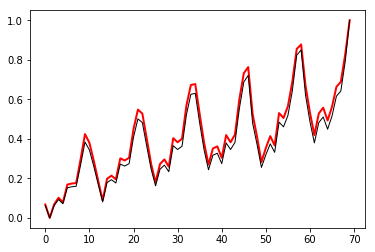

In [214]:
plt.plot(y_pred,color="red",linewidth=2)
plt.plot(test,color="black",linewidth=1)
plt.show()